In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from pandas import read_csv
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score    
    
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import auc, roc_curve

from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
import warnings


In [2]:
#filename = 'kickstarter_data_full.csv'
filename = 'kickstarter_data_with_features.csv'
# Read the CSV file with the specified data types
data = pd.read_csv(filename, low_memory = False)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20632 non-null  int64  
 1   id                        20632 non-null  int64  
 2   photo                     20632 non-null  object 
 3   name                      20632 non-null  object 
 4   blurb                     20627 non-null  object 
 5   goal                      20632 non-null  float64
 6   pledged                   20632 non-null  float64
 7   state                     20632 non-null  object 
 8   slug                      20632 non-null  object 
 9   disable_communication     20632 non-null  bool   
 10  country                   20632 non-null  object 
 11  currency                  20632 non-null  object 
 12  currency_symbol           20632 non-null  object 
 13  currency_trailing_code    20632 non-null  bool   
 14  deadli

In [4]:
data['category'].value_counts()

Web             3325
Hardware        3248
Software        2631
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: category, dtype: int64

In [5]:
le_category = LabelEncoder()
data['le_category'] = le_category.fit_transform(data['category'])
data.info()
data['le_category'].head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20632 non-null  int64  
 1   id                        20632 non-null  int64  
 2   photo                     20632 non-null  object 
 3   name                      20632 non-null  object 
 4   blurb                     20627 non-null  object 
 5   goal                      20632 non-null  float64
 6   pledged                   20632 non-null  float64
 7   state                     20632 non-null  object 
 8   slug                      20632 non-null  object 
 9   disable_communication     20632 non-null  bool   
 10  country                   20632 non-null  object 
 11  currency                  20632 non-null  object 
 12  currency_symbol           20632 non-null  object 
 13  currency_trailing_code    20632 non-null  bool   
 14  deadli

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20    12
21    12
22    12
23    12
24    12
25    12
26    12
27    12
28    12
29    12
30    12
31    12
32    12
33    12
34    12
35    12
36    12
37    12
38    12
39    12
40    12
41    12
42    12
43    12
44    12
45    12
46    12
47    12
48    12
49    12
Name: le_category, dtype: int64

In [6]:
data['category'].isna().sum()

1889

In [7]:
data = data.drop('Unnamed: 0', axis=1)
#data = data.drop_duplicates(subset='id', keep='first')
duplicates = data[data.duplicated(subset='id')]

In [8]:
print(len(duplicates))

0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20632 non-null  int64  
 1   photo                     20632 non-null  object 
 2   name                      20632 non-null  object 
 3   blurb                     20627 non-null  object 
 4   goal                      20632 non-null  float64
 5   pledged                   20632 non-null  float64
 6   state                     20632 non-null  object 
 7   slug                      20632 non-null  object 
 8   disable_communication     20632 non-null  bool   
 9   country                   20632 non-null  object 
 10  currency                  20632 non-null  object 
 11  currency_symbol           20632 non-null  object 
 12  currency_trailing_code    20632 non-null  bool   
 13  deadline                  20632 non-null  object 
 14  state_

In [10]:
data['location'].nunique()
#data['location'].value_counts()

5178

In [11]:
data.disable_communication.value_counts(normalize=True)
data = data.drop(['disable_communication'], axis=1)

In [12]:
data.staff_pick.value_counts(normalize=True)
data = data.drop(['staff_pick'], axis=1)

In [13]:
data.country.value_counts(normalize=True)

US    0.685392
GB    0.121074
CA    0.053218
AU    0.032668
DE    0.018273
NL    0.015607
FR    0.015122
IT    0.011826
ES    0.008143
DK    0.005962
NZ    0.005380
SE    0.004653
CH    0.004556
IE    0.003829
NO    0.003102
AT    0.003054
MX    0.002666
BE    0.002472
HK    0.001696
SG    0.001212
LU    0.000097
Name: country, dtype: float64

In [14]:
le_created_at_weekday = LabelEncoder()
data['le_created_at_weekday'] = le_created_at_weekday.fit_transform(data['created_at_weekday'])
data.info()
data['le_created_at_weekday'].head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20632 non-null  int64  
 1   photo                     20632 non-null  object 
 2   name                      20632 non-null  object 
 3   blurb                     20627 non-null  object 
 4   goal                      20632 non-null  float64
 5   pledged                   20632 non-null  float64
 6   state                     20632 non-null  object 
 7   slug                      20632 non-null  object 
 8   country                   20632 non-null  object 
 9   currency                  20632 non-null  object 
 10  currency_symbol           20632 non-null  object 
 11  currency_trailing_code    20632 non-null  bool   
 12  deadline                  20632 non-null  object 
 13  state_changed_at          20632 non-null  object 
 14  create

0     2
1     0
2     2
3     0
4     6
5     1
6     6
7     4
8     0
9     3
10    1
11    5
12    1
13    0
14    2
15    4
16    1
17    4
18    4
19    1
20    1
21    2
22    5
23    0
24    0
25    0
26    5
27    1
28    4
29    1
30    1
31    0
32    1
33    4
34    6
35    4
36    4
37    0
38    2
39    3
40    1
41    5
42    5
43    1
44    1
45    0
46    2
47    1
48    6
49    5
Name: le_created_at_weekday, dtype: int64

In [15]:
le_launched_at_weekday = LabelEncoder()
data['le_launched_at_weekday'] = le_launched_at_weekday.fit_transform(data['launched_at_weekday'])
data.info()
data['le_launched_at_weekday'].head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20632 non-null  int64  
 1   photo                     20632 non-null  object 
 2   name                      20632 non-null  object 
 3   blurb                     20627 non-null  object 
 4   goal                      20632 non-null  float64
 5   pledged                   20632 non-null  float64
 6   state                     20632 non-null  object 
 7   slug                      20632 non-null  object 
 8   country                   20632 non-null  object 
 9   currency                  20632 non-null  object 
 10  currency_symbol           20632 non-null  object 
 11  currency_trailing_code    20632 non-null  bool   
 12  deadline                  20632 non-null  object 
 13  state_changed_at          20632 non-null  object 
 14  create

0     6
1     1
2     3
3     2
4     4
5     6
6     6
7     4
8     3
9     1
10    5
11    3
12    1
13    0
14    6
15    6
16    1
17    3
18    5
19    5
20    5
21    6
22    6
23    3
24    5
25    6
26    0
27    1
28    1
29    5
30    6
31    1
32    5
33    6
34    4
35    4
36    6
37    4
38    1
39    3
40    3
41    5
42    6
43    4
44    4
45    2
46    4
47    5
48    5
49    5
Name: le_launched_at_weekday, dtype: int64

In [16]:
# extra: label encode the words in blurb and identify patterns 
data = data.drop([ 'photo', 'name', 'blurb' ], axis=1)

# mostly null values  DONE
data = data.drop([ 'friends', 'is_starred', 'is_backing', 'permissions' ], axis=1)

# Irrelevant DONE
data = data.drop([ 'currency', 'country', 'currency', 'currency_symbol', 'currency_trailing_code' ], axis=1)

# reinclude id and drop duplicates <- analyse how many duplictaes first  and then drop the "unnamed" col
data = data.drop(['launch_to_deadline', 'deadline', 'launch_to_state_change'], axis=1)

# DONE
data = data.drop([ 'slug', 'state_changed_at', 'launched_at', 'created_at'], axis=1)

# analyse location further and check how manu diff values <- reinclude if it sounds useful
#data['location'].value_counts() # if there are 10000 locations, i would plot the historgram and see -> if hist is like horizontal rectangle, i know that location should be irrelevant 
data = data.drop([ 'location', 'profile', 'spotlight'], axis=1)

# pretty sure is useless
data = data.drop([ 'urls', 'source_url'], axis=1)

#these could be important later <- analyse these further later Label encode these 
data = data.drop([ 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday'], axis=1)
data = data.drop([ 'create_to_launch'], axis=1)

#staff pick is probably important, analyse further
#data = data.drop([ 'staff_pick', 'disable_communication'], axis=1)

data = data.drop([ 'created_at_hr', 'state_changed_at_hr', 'deadline_hr', 'launched_at_hr' ], axis=1)

data = data.drop([ 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr'], axis=1)

#category is definitely important, numerical encode and then reinclude  DONE 
data = data.drop([ 'category'], axis=1)
data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20632 non-null  int64  
 1   goal                    20632 non-null  float64
 2   pledged                 20632 non-null  float64
 3   state                   20632 non-null  object 
 4   backers_count           20632 non-null  int64  
 5   static_usd_rate         20632 non-null  float64
 6   usd_pledged             20632 non-null  float64
 7   creator                 20632 non-null  object 
 8   name_len                20627 non-null  float64
 9   name_len_clean          20627 non-null  float64
 10  blurb_len               20627 non-null  float64
 11  blurb_len_clean         20627 non-null  float64
 12  deadline_month          20632 non-null  int64  
 13  deadline_day            20632 non-null  int64  
 14  deadline_yr             20632 non-null

In [17]:
data = data.drop([ 'creator'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20632 non-null  int64  
 1   goal                    20632 non-null  float64
 2   pledged                 20632 non-null  float64
 3   state                   20632 non-null  object 
 4   backers_count           20632 non-null  int64  
 5   static_usd_rate         20632 non-null  float64
 6   usd_pledged             20632 non-null  float64
 7   name_len                20627 non-null  float64
 8   name_len_clean          20627 non-null  float64
 9   blurb_len               20627 non-null  float64
 10  blurb_len_clean         20627 non-null  float64
 11  deadline_month          20632 non-null  int64  
 12  deadline_day            20632 non-null  int64  
 13  deadline_yr             20632 non-null  int64  
 14  created_at_month        20632 non-null

In [18]:
data['usd_goal'] = round(data['goal'] * data['static_usd_rate'],2)
data.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [19]:
# float to int conversion 
data['usd_goal']= data['usd_goal'].astype(int)
data['pledged']= data['pledged'].astype(int)
data['usd_pledged']= data['usd_pledged'].astype(int)


data = data.drop([ 'name_len', 'blurb_len'], axis=1)

# Define a list of column names to convert
cols_to_convert = ['name_len_clean', 'blurb_len_clean']
for col in cols_to_convert:
    # Replace NaN values with 0
    data[col] = data[col].fillna(0)

    # Replace infinite values with the maximum value in the column
    max_val = data[col].replace([np.inf, -np.inf], np.nan).max()
    data[col] = data[col].replace([np.inf, -np.inf], max_val)

    # Convert the column to integer
    data[col] = data[col].astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      20632 non-null  int64 
 1   pledged                 20632 non-null  int64 
 2   state                   20632 non-null  object
 3   backers_count           20632 non-null  int64 
 4   usd_pledged             20632 non-null  int64 
 5   name_len_clean          20632 non-null  int64 
 6   blurb_len_clean         20632 non-null  int64 
 7   deadline_month          20632 non-null  int64 
 8   deadline_day            20632 non-null  int64 
 9   deadline_yr             20632 non-null  int64 
 10  created_at_month        20632 non-null  int64 
 11  created_at_day          20632 non-null  int64 
 12  created_at_yr           20632 non-null  int64 
 13  launched_at_month       20632 non-null  int64 
 14  launched_at_day         20632 non-null  int64 
 15  la

In [20]:
data.isna().sum()

id                        0
pledged                   0
state                     0
backers_count             0
usd_pledged               0
name_len_clean            0
blurb_len_clean           0
deadline_month            0
deadline_day              0
deadline_yr               0
created_at_month          0
created_at_day            0
created_at_yr             0
launched_at_month         0
launched_at_day           0
launched_at_yr            0
le_category               0
le_created_at_weekday     0
le_launched_at_weekday    0
usd_goal                  0
dtype: int64

In [21]:
data['state'].value_counts()

failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

In [22]:
# METHOD 1: SUCCESSFUL VS NON-SUCCESSFUL Fields 

#data2 is categorical data. 
data['state'] = data['state'].replace({'successful': 1, 'failed': 0, 'canceled': 0, 'live': 0, 'suspended': 0})
print(data['state'].value_counts())

# METHOD 2: SUCCESSFUL VS FAILED Fields and drop the other 3
# data.drop(data[data.state.isin(["canceled", "live","suspended"])].index,inplace=True)
# data['state'] = data['state'].replace({'successful': 1, 'failed': 0})
# print(data['state'])

0    14614
1     6018
Name: state, dtype: int64


In [23]:
print(data['state'].value_counts())

0    14614
1     6018
Name: state, dtype: int64


In [24]:
# METHOD 3 : Not binary classification 
#state_map = {'failed': 0, 'successful': 1, 'canceled': 2, 'live': 3, 'suspended': 4}
#data['state'] = data['state'].map(state_map)

#drop the values cancelled, live and suspended 

# Verify the conversion
#print(data['state'].value_counts())


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      20632 non-null  int64
 1   pledged                 20632 non-null  int64
 2   state                   20632 non-null  int64
 3   backers_count           20632 non-null  int64
 4   usd_pledged             20632 non-null  int64
 5   name_len_clean          20632 non-null  int64
 6   blurb_len_clean         20632 non-null  int64
 7   deadline_month          20632 non-null  int64
 8   deadline_day            20632 non-null  int64
 9   deadline_yr             20632 non-null  int64
 10  created_at_month        20632 non-null  int64
 11  created_at_day          20632 non-null  int64
 12  created_at_yr           20632 non-null  int64
 13  launched_at_month       20632 non-null  int64
 14  launched_at_day         20632 non-null  int64
 15  launched_at_yr     

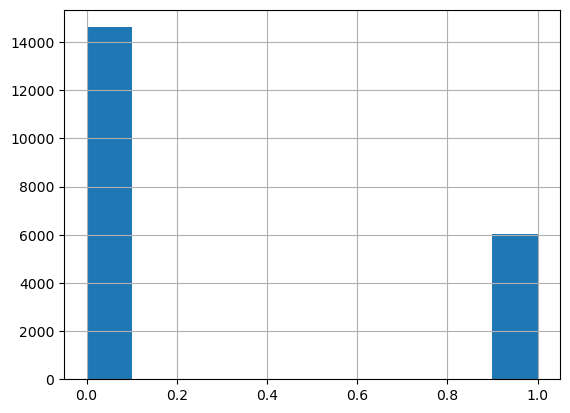

In [26]:
array = data.values
X = data.drop(columns=['state'])
y = data['state']

histY = y.hist()

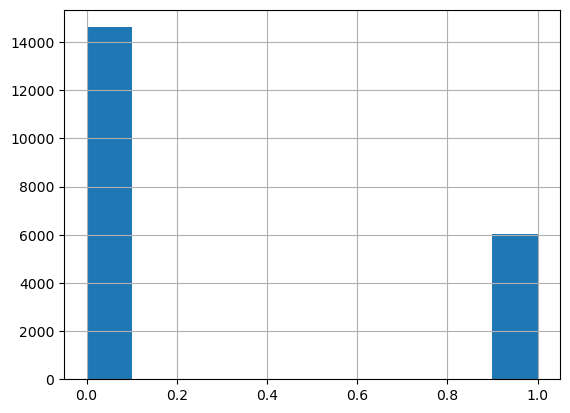

In [27]:
array2=data.values
X2 = data.drop(columns=['state'])
y2 = data['state']

histY2 = y2.hist()

In [28]:
data.describe()

,id,pledged,state,backers_count,usd_pledged,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_yr,created_at_month,created_at_day,created_at_yr,launched_at_month,launched_at_day,launched_at_yr,le_category,le_created_at_weekday,le_launched_at_weekday,usd_goal
count,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20632.000000,20632.000000,20632.000000,20632.000000,20632.00000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,2.063200e+04
mean,1.071156e+09,2.139264e+04,0.291683,183.675843,2.091575e+04,5.291295,13.078034,6.707784,15.695134,2014.83259,6.473633,15.542652,2014.620105,6.541828,15.322363,2014.752084,13.802007,3.156020,3.275204,8.772109e+04
std,6.154929e+08,1.204972e+05,0.454548,1222.012658,1.154717e+05,2.419278,3.289457,3.411420,9.027917,1.27042,3.345992,8.776659,1.273937,3.379879,8.800871,1.261752,7.095887,2.057093,2.168526,1.284945e+06
min,1.645550e+05,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2009.00000,1.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.472185e+08,2.500000e+01,0.000000,2.000000,2.500000e+01,3.000000,11.000000,4.000000,8.000000,2014.00000,4.000000,8.000000,2014.000000,4.000000,8.000000,2014.000000,8.000000,1.000000,1.000000,4.000000e+03
50%,1.069882e+09,6.950000e+02,0.000000,12.000000,7.160000e+02,5.000000,13.000000,7.000000,15.000000,2015.00000,7.000000,15.000000,2015.000000,7.000000,15.000000,2015.000000,13.000000,3.000000,4.000000,1.374950e+04
75%,1.601801e+09,5.954250e+03,1.000000,63.000000,6.004250e+03,7.000000,15.000000,10.000000,23.000000,2016.00000,9.000000,23.000000,2016.000000,9.000000,23.000000,2016.000000,22.000000,5.000000,5.000000,4.524725e+04
max,2.147388e+09,6.225354e+06,1.000000,105857.000000,6.225354e+06,14.000000,30.000000,12.000000,31.000000,2017.00000,12.000000,31.000000,2017.000000,12.000000,31.000000,2017.000000,24.000000,6.000000,6.000000,1.000000e+08


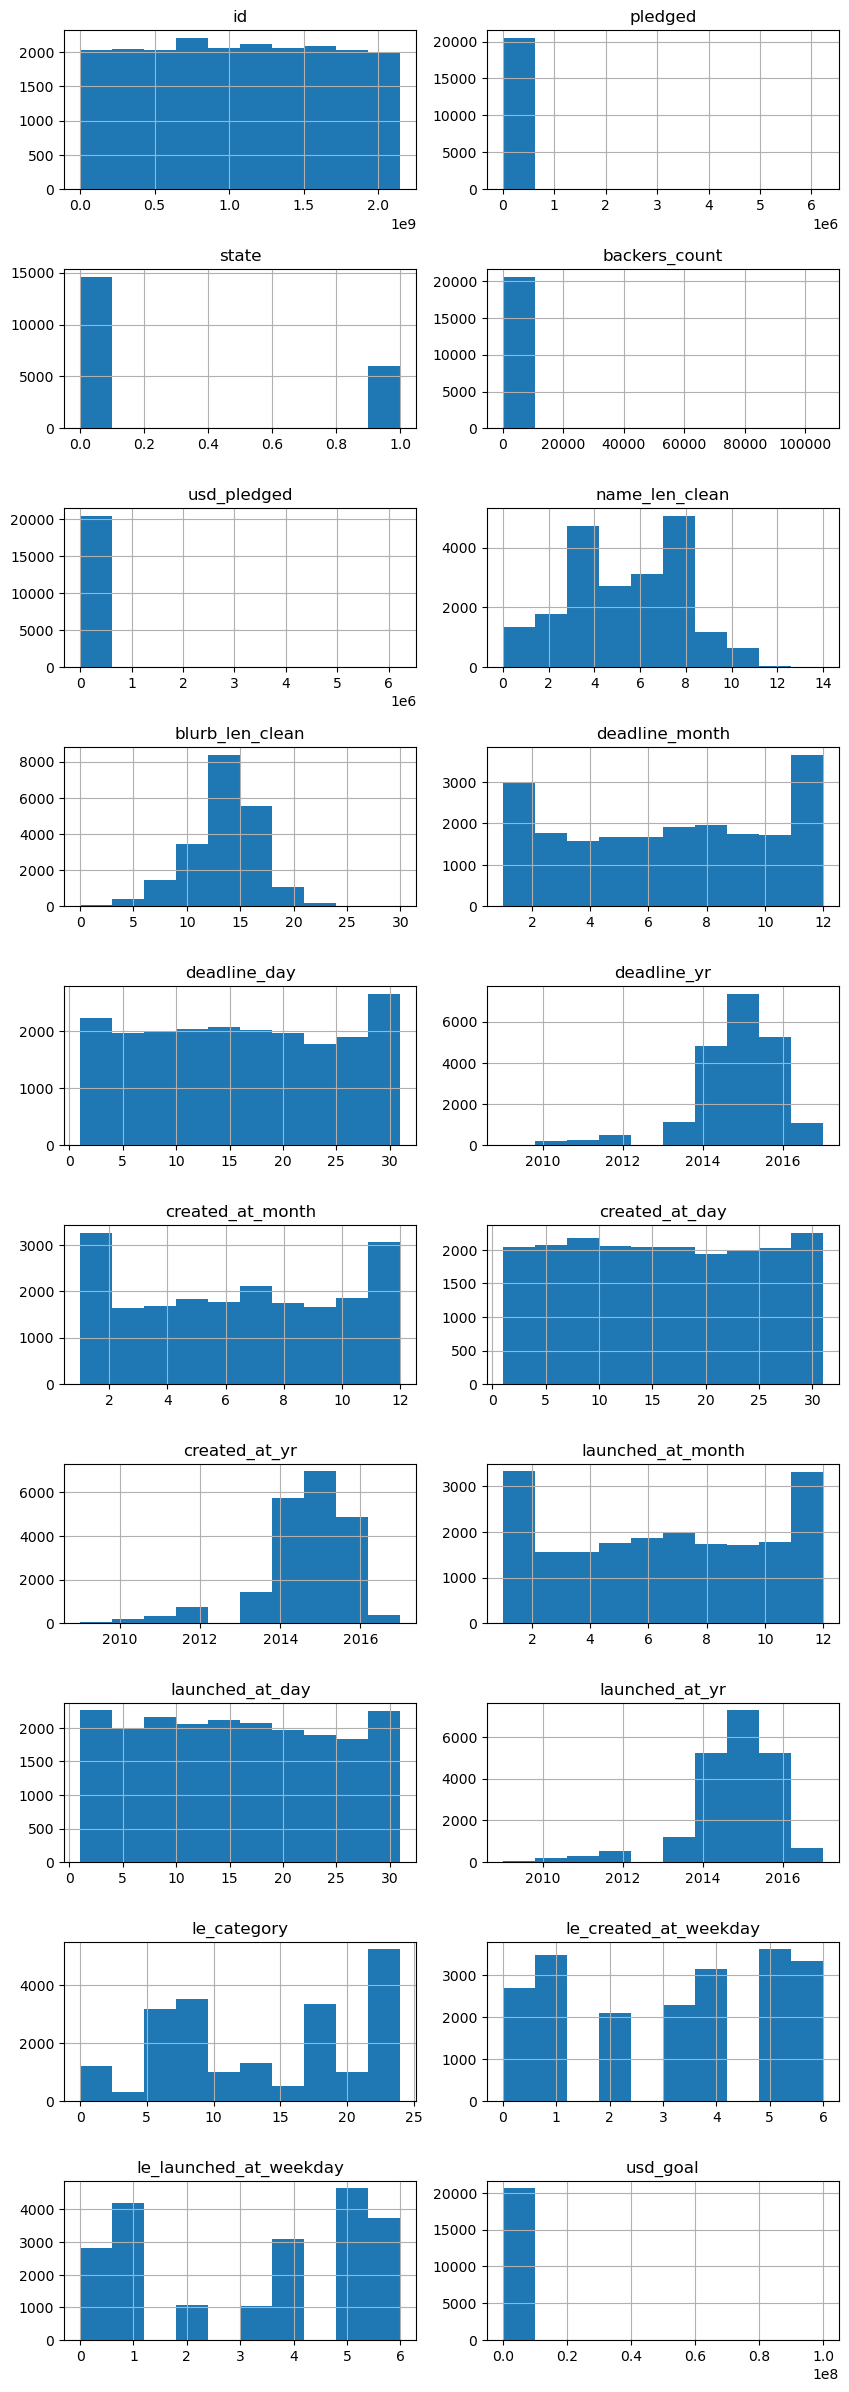

In [29]:
import matplotlib.pyplot as plt

# Calculate the number of rows and columns based on the number of columns in the DataFrame and the desired number of columns in the subplot grid
n_cols = 2
n_rows = (len(data.describe().columns) - 1) // n_cols + 1

# Generate the histograms with space between them
fig = data[data.describe().columns].hist(layout=(n_rows, n_cols), figsize=(10, 30))

# Adjust the space between the plots
plt.subplots_adjust(hspace=0.5, wspace=0.2)

# Show the plots
plt.show()


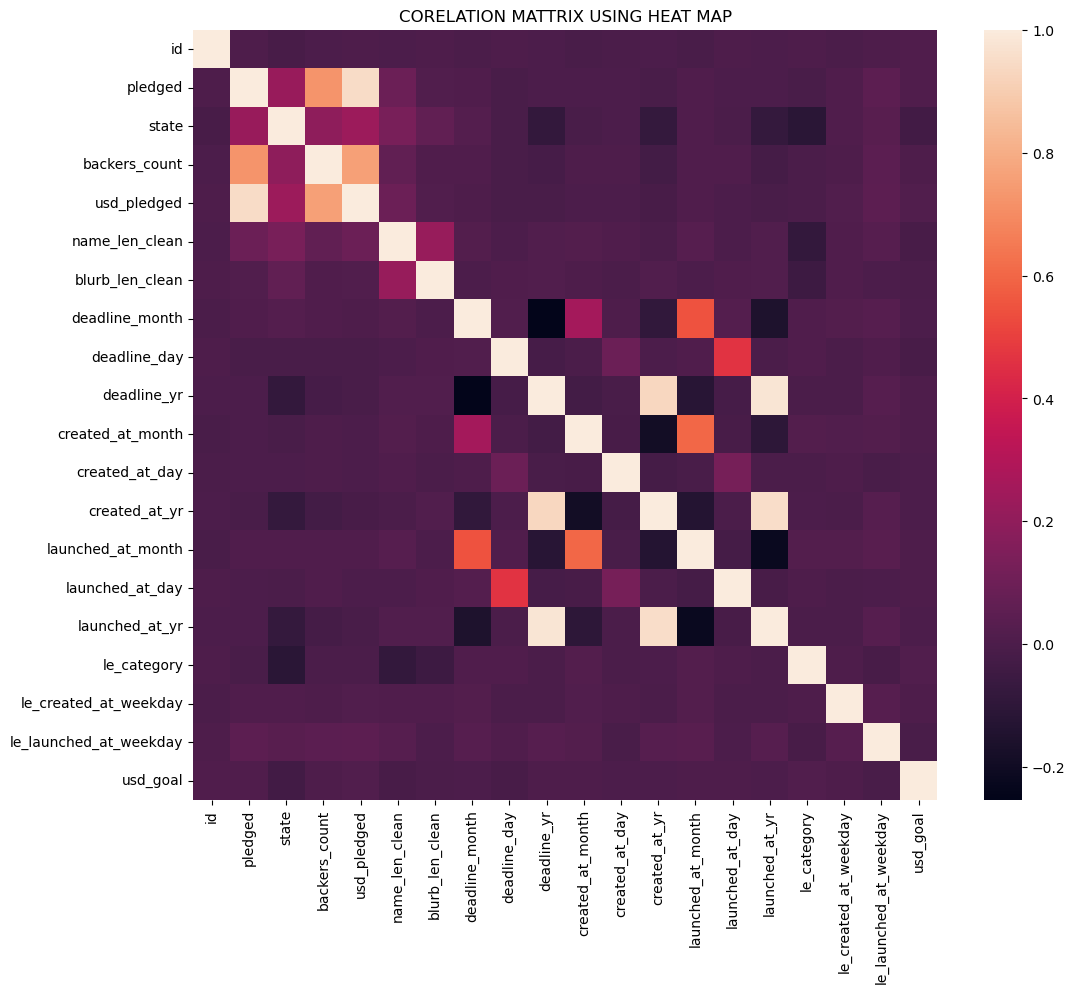

In [30]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,ax=ax)
plt.title("CORELATION MATTRIX USING HEAT MAP")
plt.show()

In [31]:
# Correlation further analysis 

## PCA

Number of components explaining 80% of variance: 9
Number of components explaining 90% of variance: 12
Number of components explaining 95% of variance: 13
Transformed input features shape: (20632, 17)


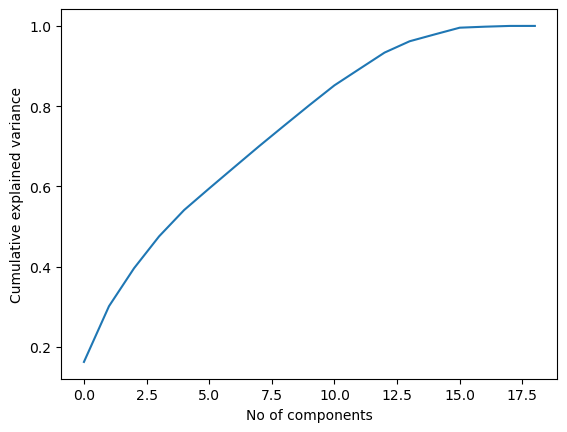

(20632, 17)

In [32]:
from sklearn.decomposition import PCA

X1 = StandardScaler().fit_transform(X)

pca = PCA(n_components = 19)
X_pca = pca.fit_transform(X1)

explained_var = np.cumsum(pca.explained_variance_ratio_)
print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 95% of variance:", np.where(explained_var > 0.95)[0][0])


pca = PCA(n_components = 17)
X_pca = pca.fit_transform(X1)
print("Transformed input features shape:", X_pca.shape)

pca = PCA().fit(X1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Cumulative explained variance")
plt.show()

# Use this dataset 

pca_data = pd.DataFrame(X_pca)
pca_data.shape

(20632, 17)

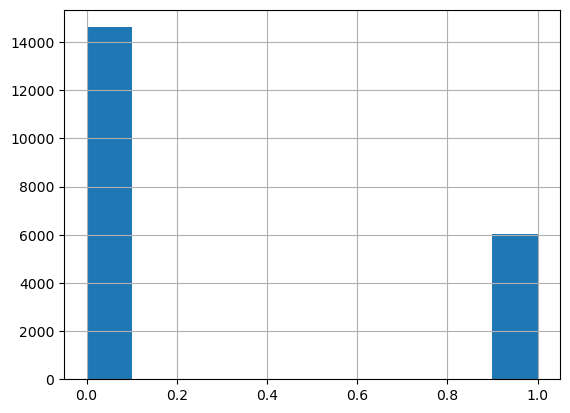

In [33]:
array_pca = pca_data.values
X_pca = pca_data
y_pca = data['state']

histY = y_pca.hist()
X_pca.shape

## Split the data into train and test sets

In [34]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# log transformation on some of the data <- columns 
# normalizing data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 9, 11, 15, 24],
    'max_features': [1.0, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 25, 35, 50],
    'min_samples_leaf': [1, 2, 4, 15, 25],
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a k-fold cross-validation object with k=5
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy' # Change scoring metric
)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best cross-validation score and best hyperparameters
print("Best accuracy score:", grid_search.best_score_)
print("Best hyperparameters:", grid_search.best_params_)


Best accuracy score: 0.983229952639188
Best hyperparameters: {'max_depth': 11, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 25}


## 2. Ensemble Methods
    

### 2.1: Bagging 

In [41]:
#DELETE THIS LATER -> saved just for reference 

# Bagging ensembles
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,max_samples=10000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#print(bag_clf.score(X_test, y_test)) # same thing as below
print(accuracy_score(y_test, y_pred))

0.9888529886914378


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [100, 500],
    'max_samples': [100, 1000],
    'bootstrap': [True, False]
}

base_estimator = DecisionTreeClassifier(max_depth= 24) #play around with different max_depths 
bag_clf = BaggingClassifier(base_estimator, random_state=42)

grid_search = GridSearchCV(
    estimator=bag_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9765751211631664


### 2.2: Random Forest

In [43]:
# compare bagging method with standard decision tree classifier
# Random Forests
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=500, max_features = 1.0, n_jobs=-1,random_state=42)
rnd_clf.fit(X_train, y_train)
y_prob_rf = rnd_clf.predict_proba(X_test)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_pred == y_pred_rf) / len(y_pred) # almost identical predictions
y_score_rf = y_prob_rf[:,1]
print(accuracy_score(y_test, y_pred_rf))


print("\nConfusion matrix: ")
print(confusion_matrix(y_test, y_pred_rf))


0.9891760904684975

Confusion matrix: 
[[4327   55]
 [  12 1796]]


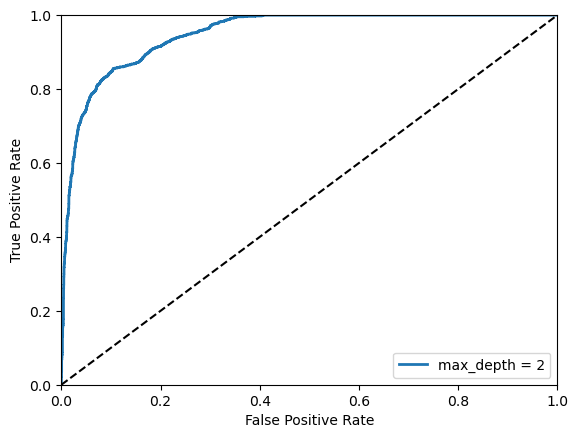

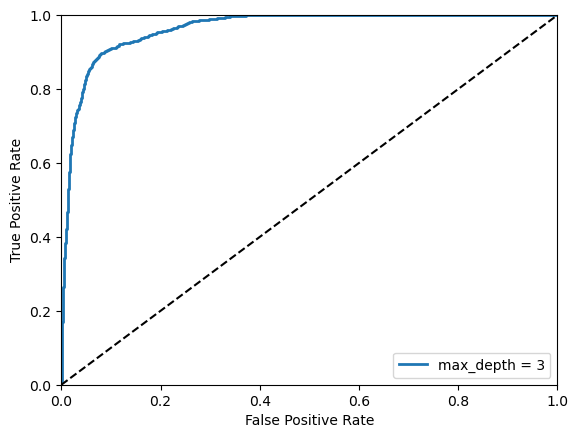

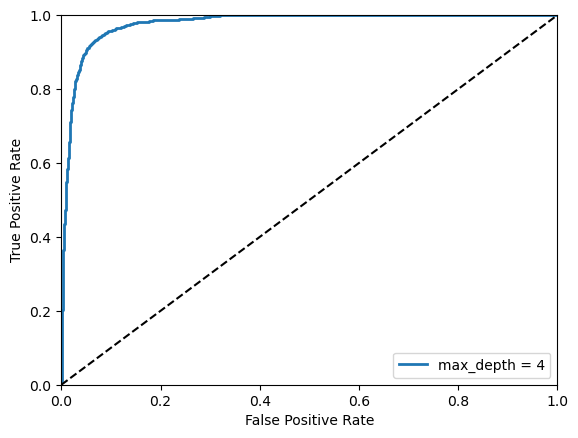

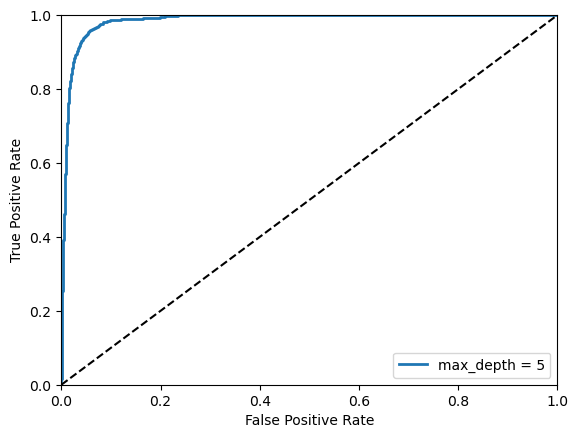

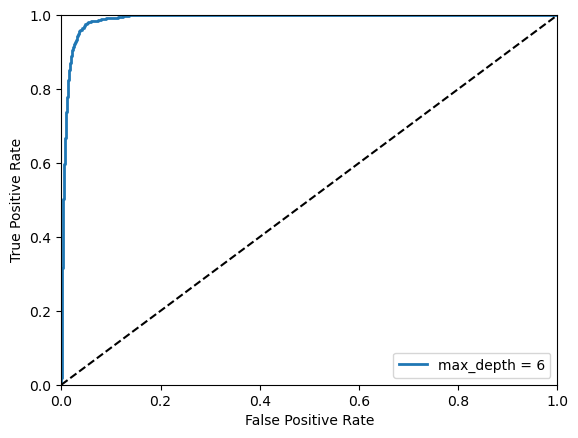

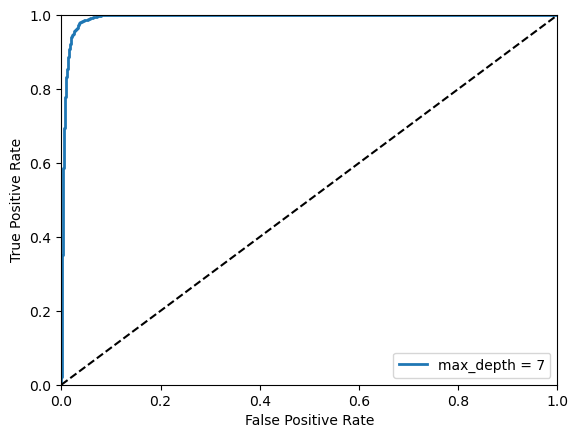

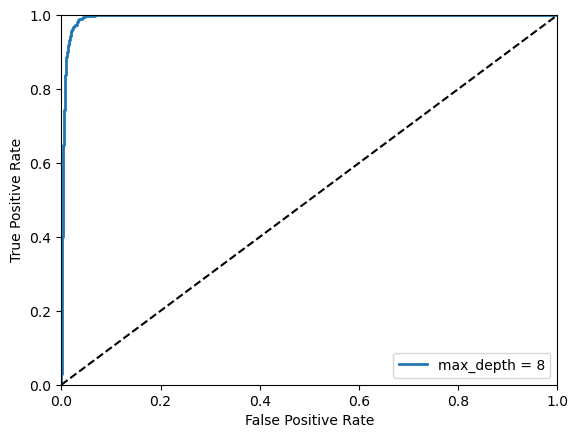

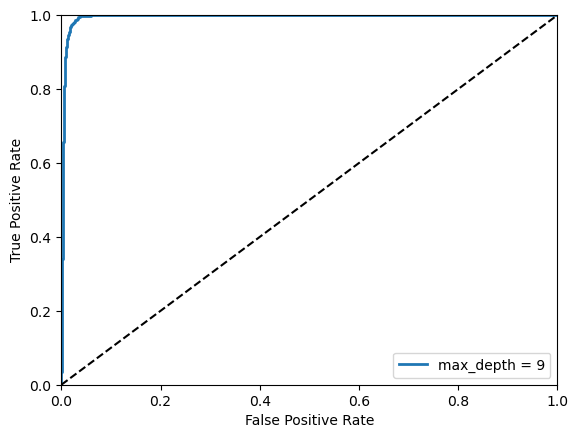

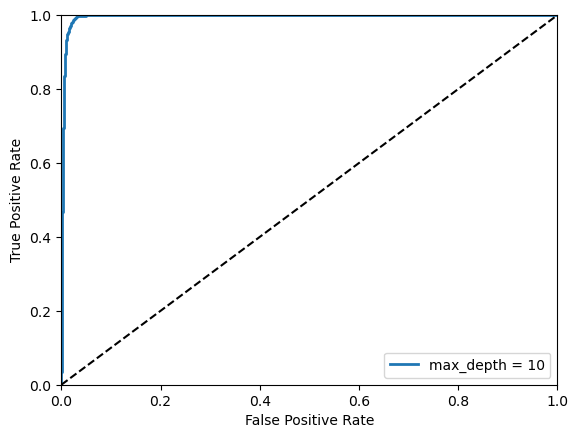

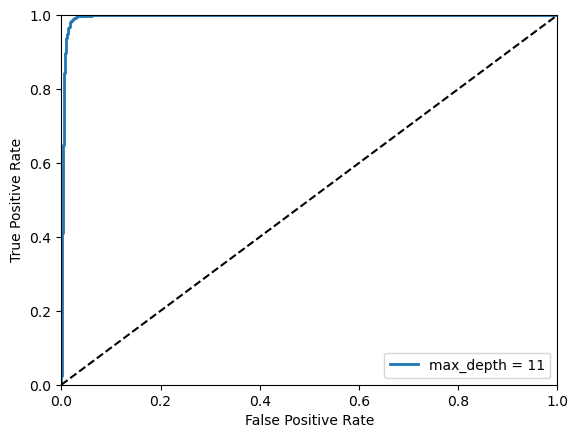

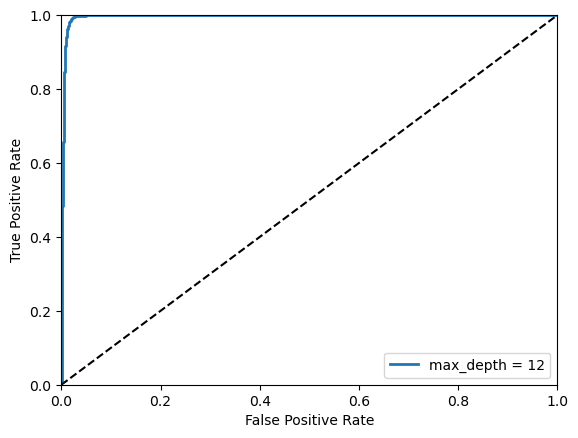

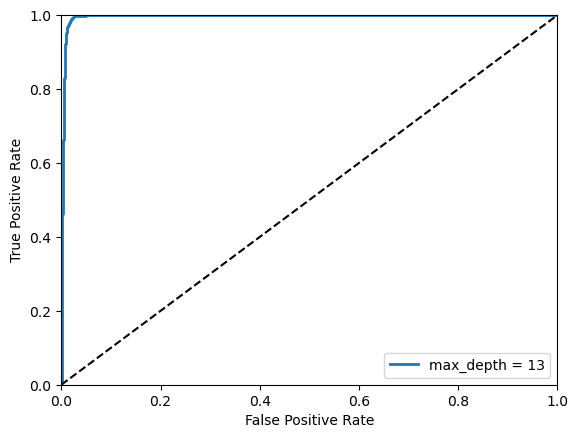

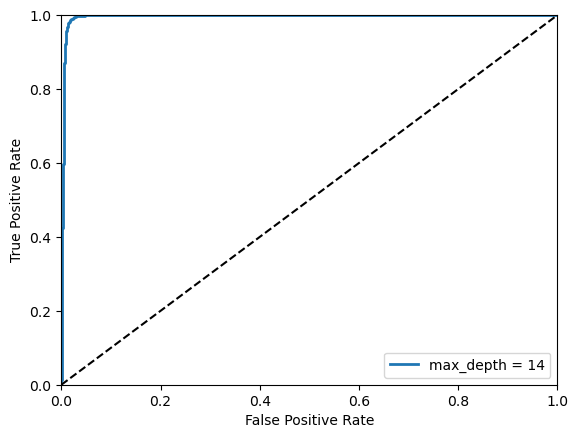

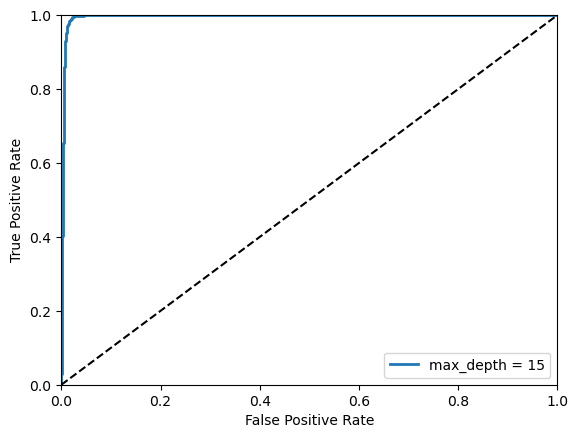

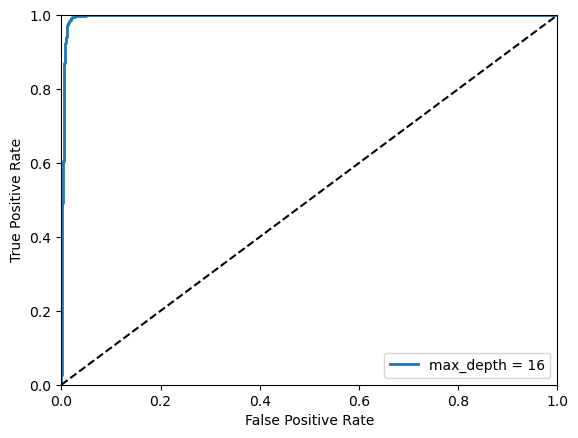

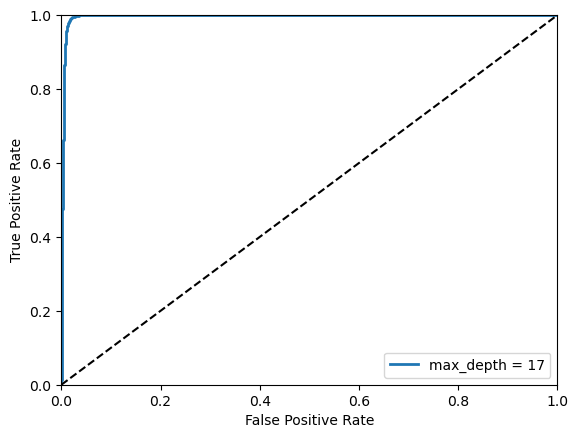

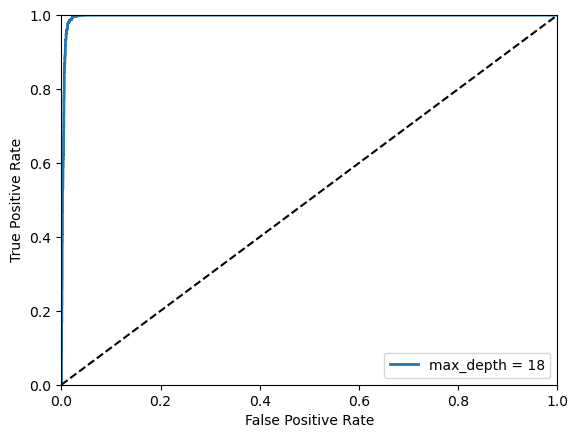

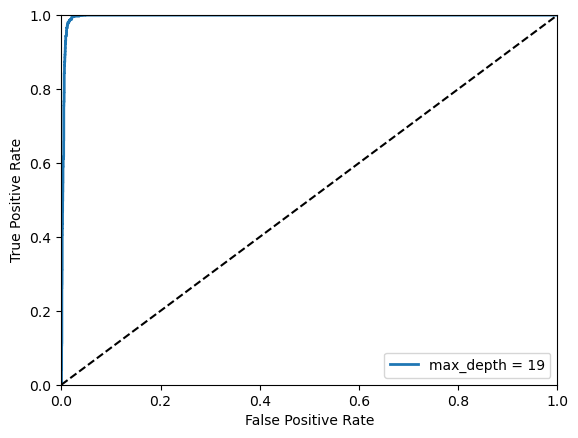

In [44]:
def plt_roc_curve(fpr, tpr, i, label=None):
    plt.plot(fpr, tpr, linewidth=2, label="max_depth = " + str(i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

def rfc(i):
    rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=i, n_jobs=-1, random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_prob_rf = rnd_clf.predict_proba(X_test)
    y_pred_rf = rnd_clf.predict(X_test)
    np.sum(y_pred == y_pred_rf) / len(y_pred) # almost identical predictions
    if len(y_prob_rf.shape) == 2 and y_prob_rf.shape[1] > 2:
        # Convert to binary classification problem
        y_test_binary = np.zeros(y_test.shape)
        y_test_binary[y_test == 0] = 1
        y_score_rf = y_prob_rf[:, 0]
        fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test_binary, y_score_rf)
    else:
        # Use original problem as is
        y_score_rf = y_prob_rf[:, 1]
        fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)
    plt_roc_curve(fpr_rf, tpr_rf, i)
    plt.show()

for i in range(2, 20):
    rfc(i)


In [45]:
# TAKING TOO LONG <- play around to find best hyperparams 


param_grid = {
    'n_estimators': [100, 500],
    # max_depth': [5, 20],
    #'min_samples_split': [2, 35],
    #'min_samples_leaf': [1, 4],
    'max_features': [1.0],
    #'bootstrap': [True, False]
}


rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'max_features': 1.0, 'n_estimators': 500}
Best score:  0.9864284865029163


### 2.2 Boosting

### 2.2.1 Adaboost 

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10]
}

base_estimator = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(base_estimator, algorithm="SAMME.R", random_state=42)

grid_search = GridSearchCV(ada_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test, y_test))


Best parameters: {'learning_rate': 0.001, 'n_estimators': 500}
Best cross-validation score: 0.9743110748670333
Test set score: 0.9804523424878837


### 3. MLP

In [47]:
#DELETE THIS LATER -> saved just for reference 

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)
mlp.predict(X_test[:2])
mlp.score(X_test, y_test)

0.950080775444265

In [48]:
#DELETE THIS LATER -> saved just for reference 

# perform cross validation on the MLPRegressor model
#mlp_scores = cross_val_score(mlp, X, y, cv=5)
#print("MLPRegressor scores:", mlp_scores)
#print("MLPRegressor mean score:", mlp_scores.mean())

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 1,10, 100],
}
 dc
# Create an instance of GridSearchCV
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters: ", best_params)
print("R^2 score on test data: ", r2)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test, y_test))

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .................max_features=1.0, n_estimators=100; total time=   5.8s
[CV] END .................max_features=1.0, n_estimators=100; total time=   5.7s
[CV] END .................max_features=1.0, n_estimators=100; total time=   5.7s
[CV] END .................max_features=1.0, n_estimators=500; total time=  24.5s
[CV] END .................max_features=1.0, n_estimators=100; total time=   5.6s
[CV] END .................max_features=1.0, n_estimators=500; total time=  22.5s
[CV] END .................max_features=1.0, n_estimators=500; total time=  24.7s
[CV] END .................max_features=1.0, n_estimators=500; total time=  24.2s
[CV] END .................max_features=1.0, n_estimators=100; total time=   5.7s
[CV] END .................max_features=1.0, n_estimators=500; total time=  22.3s


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/o

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/spartan/o

Best hyperparameters:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
R^2 score on test data:  0.8148310364605
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
Best score: 0.9558234069625066
Test set score: 0.9617124394184168


### 4. MLR

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# create a LinearRegression model
mlr = LinearRegression()

# perform RFE to get optimal number of features
selector = RFE(mlr)
selector.fit(X_train, y_train)
optimal_n_features = selector.n_features_

# create a pipeline that includes feature selection, scaling, and MLR model
steps = [('feature_selection', RFE(LinearRegression(), n_features_to_select=optimal_n_features)),
         ('scaler', StandardScaler()),
         ('model', LinearRegression())]
pipeline = Pipeline(steps)

# define the hyperparameters that you want to search over
#param_grid = {'model__fit_intercept': [True, False]}
param_grid = {'model__fit_intercept': [True, False],
              #'model__normalize': [True, False],
              'model__copy_X': [True, False],
              'model__n_jobs': [-1, 1, 2, 4],
              'model__positive': [True, False]}

# create a GridSearchCV object with the pipeline and hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=5)

# fit the GridSearchCV object on the training data
grid.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best hyperparameters:  {'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': -1, 'model__positive': False}
Best score:  0.08096091865035855


## Naive Bayes

In [52]:
#DELETE THIS LATER -> saved just for reference 

#store in some variable 
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Naive Bayes classifier accuracy:", gnb.score(X_test, y_test))

Naive Bayes classifier accuracy: 0.7781906300484652


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the range of hyperparameters to search over
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Use GridSearchCV to search over the hyperparameters
grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


Best hyperparameters: {'var_smoothing': 1e-09}
Best accuracy score: 0.775932110431295


### KNN

In [54]:
#DELETE THIS LATER -> saved just for reference 

neigh = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7148626817447497

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Define the range of hyperparameters to search
param_grid = {'n_neighbors': np.arange(1, 30)}

# Create the KNN classifier and the GridSearchCV object
neigh = KNeighborsClassifier()
grid_search = GridSearchCV(neigh, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
print("Test set score:", best_model.score(X_test, y_test))


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Best hyperparameters: {'n_neighbors': 27}
Best score: 0.7398560927925104


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set score: 0.7399030694668821


### 5. SVM 


SVC poly degree=2 accuracy: 0.7387555392582171
SVC poly degree=3 accuracy: 0.7765125233130699
SVC poly degree=4 accuracy: 0.7463166847173263
SVC poly degree=5 accuracy: 0.7551864158813231
SVC rbf accuracy: 0.7972080576452834


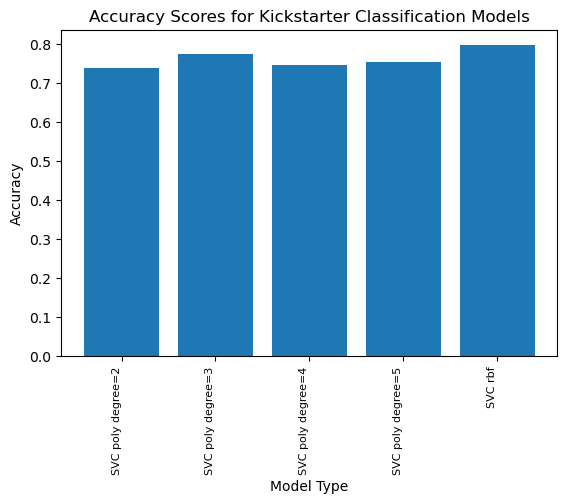

In [56]:
def evaluate_models(X, y, models):
    # Train and evaluate each model using KFold cross-validation with k = 10
    scores = {name: [] for name, _ in models}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for name, model in models:
            model.fit(X_train, y_train)
            scores[name].append(accuracy_score(y_test, model.predict(X_test)))

    # Print the average accuracy scores for each model
    for name, _ in models:
        print(f"{name} accuracy:", sum(scores[name])/len(scores[name]))

    # Plot the average accuracy scores for each model
    plt.bar([name for name, _ in models], [sum(scores[name])/len(scores[name]) for name, _ in models])
    plt.title("Accuracy Scores for Kickstarter Classification Models")
    plt.xlabel("Model Type")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=90, ha="right", fontsize=8)
    plt.subplots_adjust(bottom=0.2)
    plt.show()
    
# Compare the results with the RBF kernel and the same value of C=1.0
# Edit the models to add RBF kernel
kf = KFold(n_splits=5, shuffle=True, random_state=42)

poly_models = [("SVC poly degree={}".format(d), SVC(kernel="poly", degree=d, C=1.0)) for d in range(2, 6)]
rbf_models = [("SVC rbf", SVC(kernel="rbf", C=1.0))]
models = poly_models + rbf_models 

# KFold Cross validation with k = 10 and plot results of accuracy
evaluate_models(X, y, models)

SVC poly best score: 0.7673034334856197
SVC rbf best score: 0.7673034334856197


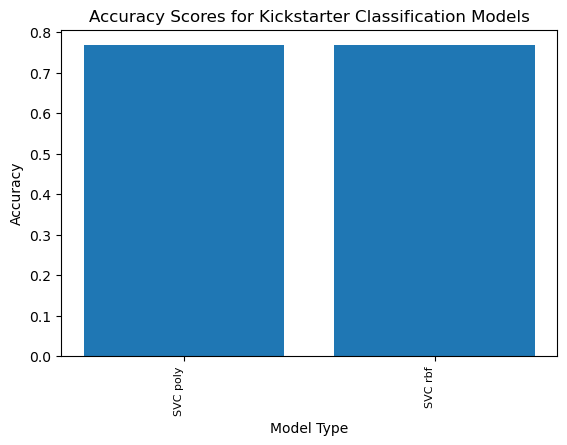

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned for the SVC models
param_grid = {
    'C': [0.1],
    'kernel': [ 'rbf'],
    #'degree': [2, 3, 4, 5], #try to add more degrees of polynomials 
    #'gamma': ['scale', 'auto']
}

# Create a dictionary of models with their corresponding hyperparameters
models = {
    'SVC poly': GridSearchCV(SVC(), param_grid, cv=kf),
    'SVC rbf': GridSearchCV(SVC(), param_grid, cv=kf)
}

# Fit and evaluate the models using KFold cross-validation with k = 10
scores = {}
for name, model in models.items():
    model.fit(X, y)
    scores[name] = model.best_score_
    print(f"{name} best score:", scores[name])

# Plot the average accuracy scores for each model
plt.bar(scores.keys(), scores.values())
plt.title("Accuracy Scores for Kickstarter Classification Models")
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.subplots_adjust(bottom=0.2)
plt.show()


Logistic regression score for training set: 0.87959
Logistic regression score for test set: 0.88013

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4382
           1       0.96      0.62      0.75      1808

    accuracy                           0.88      6190
   macro avg       0.91      0.80      0.84      6190
weighted avg       0.89      0.88      0.87      6190

AUC: 0.98325


/var/folders/2q/k0w24qvn2wj7d37xys70fjrw0000gr/T/ipykernel_71650/830202965.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


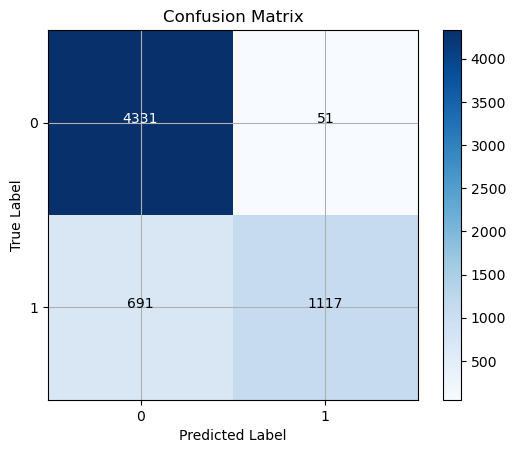

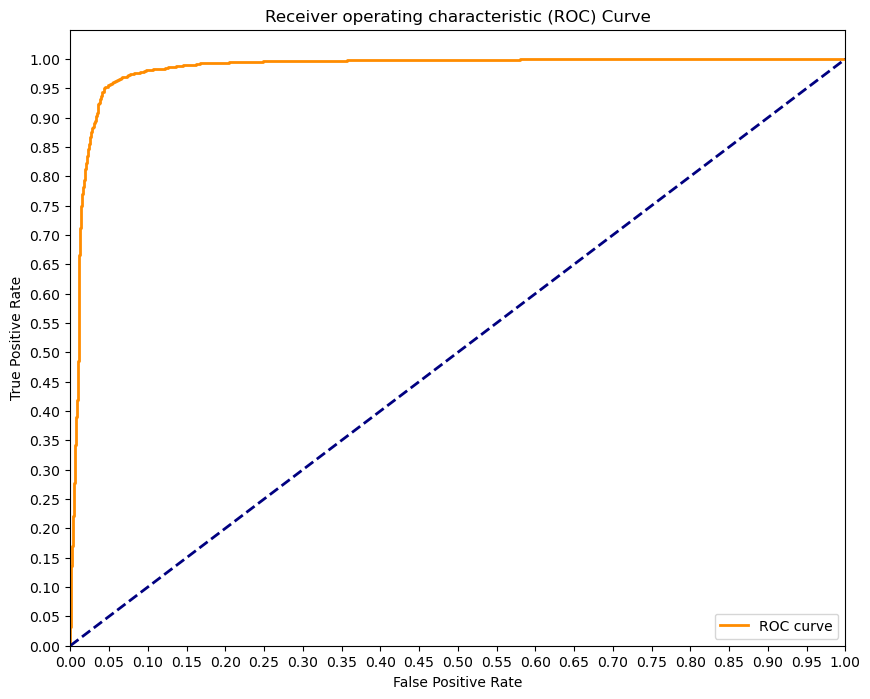

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import auc, roc_curve


#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
    
# Confusion matrix
plot_cf(y_test, y_hat_test)

# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


xgb_clf = xgb.XGBClassifier()


param_grid = {
    'n_estimators': [500],
    'max_depth': [3, 9],
    'learning_rate': [0.01],
    #'subsample': [0.5, 0.8, 1.0],
    #'colsample_bytree': [0.5, 0.8, 1.0]
}


grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.9893376413570275
